# UNSUPERVISED METHODS

In [1]:
# Unsupervised ML methods - PCA and TSNE
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()

print(digits.images.shape)
print(digits.data.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797, 64)
(1797,)


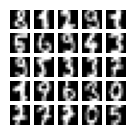

[8 1 2 9 1 5 6 9 4 3 9 5 3 3 7 1 9 6 3 0 7 7 7 0 5]


In [3]:
# Plot 25 random images
ids = np.random.randint(low = 0, high = digits.images.shape[0], size = 25)

# 5x5 plots of the images with padding
fig, ax = plt.subplots(5, 5, figsize = (1.5, 1.5))
for i, a in enumerate(ax.ravel()):
    a.imshow(digits.images[ids[i]], cmap="gray")
    a.axis("off")

plt.show()

print(digits.target[ids])

In [4]:
pca = PCA(n_components = 2, random_state = 12345)
tsne = TSNE(n_components = 2, random_state = 12345)

# PCA
pca = pca.fit_transform(digits.data)
# TSNE
tsne = tsne.fit_transform(digits.data)

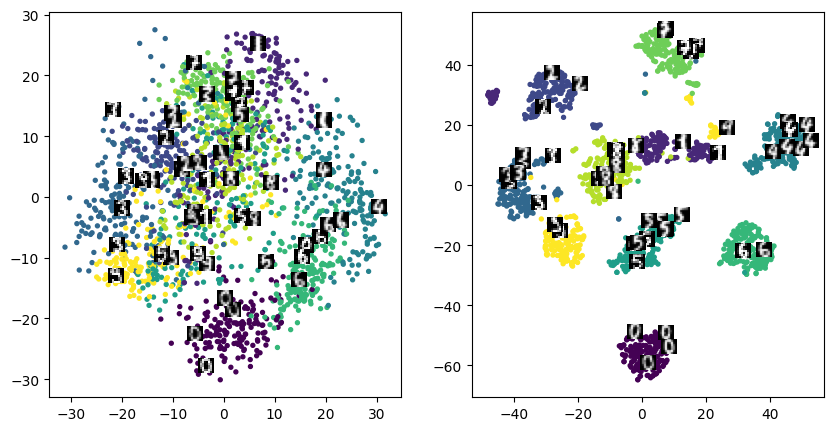

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].scatter(x = pca[:, 0], y = pca[:, 1], s = 8, c = digits.target)

ids = np.random.randint(low = 0, high = digits.images.shape[0], size = 50)
for i in ids:
    inset = ax[0].inset_axes([pca[i, 0], pca[i, 1], 3, 3], transform = ax[0].transData)
    inset.imshow(digits.images[i], cmap="gray")
    inset.axis("off")

ax[1].scatter(x = tsne[:, 0], y = tsne[:, 1], s = 8, c = digits.target)
ids = np.random.randint(low = 0, high = digits.images.shape[0], size = 50)
for i in ids:
    inset = ax[1].inset_axes([tsne[i, 0], tsne[i, 1], 5, 5], transform = ax[1].transData)
    inset.imshow(digits.images[i], cmap="gray")
    inset.axis("off")

plt.show()

# SUPERVISED METHOD

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

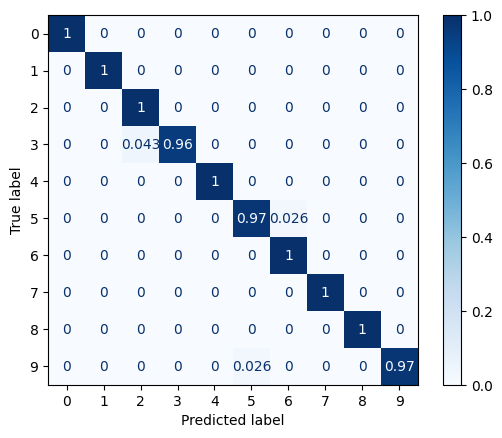

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

# Train an SVM classifier
classifier = SVC()
classifier = classifier.fit(X_train, y_train)

test_prediction = classifier.predict(X_test)

cm = confusion_matrix(y_test, test_prediction, normalize = "true")
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap = "Blues")
plt.show()